Note: you may need to restart the kernel to use updated packages.


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

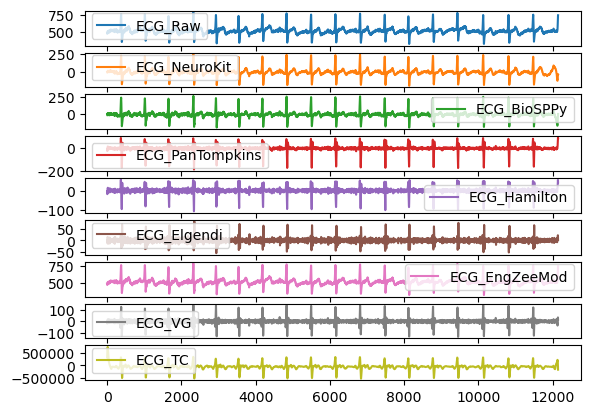

In [1]:
%pip install neurokit2 seaborn

import neurokit2 as nk

import pandas as pd

import numpy as np

#ecg = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.2)

#ecg += np.random.normal(0, 0.1, len(ecg))

ecg= np.loadtxt(r'C:\Users\hp\ISB-Grupo-5\Otros\Archivos_varios\Lab5_ECG\reposoD1.txt', comments='#',skiprows=4, usecols=5)

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),
    "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),
    "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),
    "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),
    "ECG_VG" : nk.ecg_clean(ecg, sampling_rate=250, method="vg"),
    "ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")
})

signals.plot(subplots=True)
